<a href="https://colab.research.google.com/github/Dhlih/Visi_Komputer_SMT3/blob/main/jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1 = Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


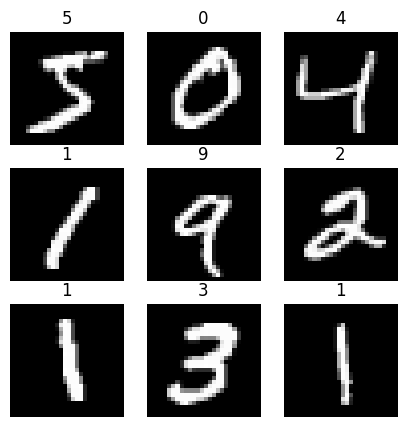

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()



### Tugas Kecil Praktikum D1

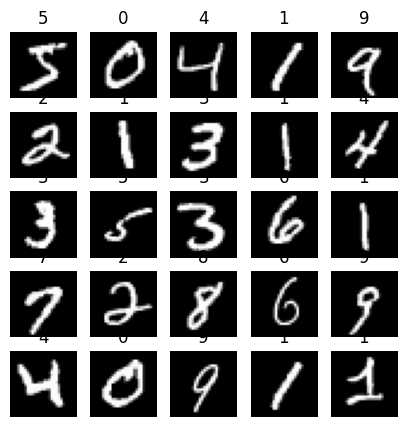

In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()


## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)

# svm
clf = svm.SVC(kernel="linear", gamma="scale")
clf.fit(x_train_flatten[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flatten)
print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9094


### Tugas Kecil Praktikum D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)

# svm
clf = svm.SVC(kernel="rbf", gamma="scale")
clf.fit(x_train_flatten[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flatten)
print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9513


## Praktikum D3 - Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8952 - loss: 0.3502 - val_accuracy: 0.9798 - val_loss: 0.0745
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9800 - loss: 0.0649 - val_accuracy: 0.9860 - val_loss: 0.0576
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9827 - val_loss: 0.0676
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9862 - val_loss: 0.0547
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9935 - loss: 0.0208 - val_accuracy: 0.9858 - val_loss: 0.0713


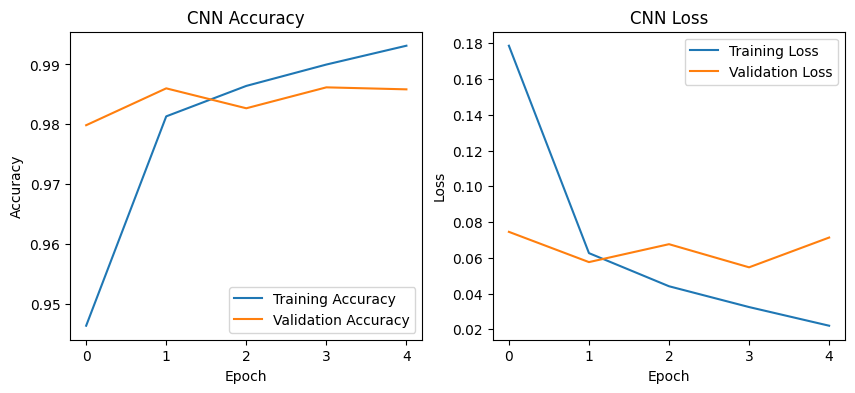

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====

# history.history["accuracy"] :
# {
#  'loss': [2.302, 1.967, 1.745, ...],         # loss tiap epoch (train)
#  'accuracy': [0.28, 0.36, 0.42, ...],        # akurasi tiap epoch (train)
#  'val_loss': [2.21, 1.88, 1.70, ...],        # loss tiap epoch (validasi)
#  'val_accuracy': [0.32, 0.40, 0.45, ...]     # akurasi tiap epoch (validasi)
# }

plt.figure(figsize=(10,4))
plt.subplot(1,2,1) #1 baris, 2 kolom elemen ke-1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



### Tugas Kecil Praktikum D3

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9101 - loss: 0.2929 - val_accuracy: 0.9830 - val_loss: 0.0562
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 0.9885 - val_loss: 0.0387
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0271 - val_accuracy: 0.9885 - val_loss: 0.0434
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9905 - val_loss: 0.0381
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9890 - val_loss: 0.0544


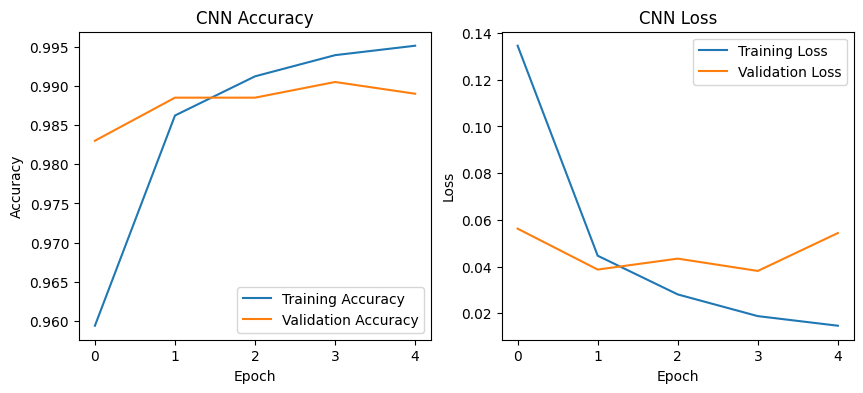

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# array setelah reshape harus sama seperti array sebelumnya (-1)
# gambar 28 x 28 dengan 1 channel warna (grayscale)
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1) #

# ===== Plot history =====

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Praktikum D4-Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3863 - loss: 1.6874 - val_accuracy: 0.5882 - val_loss: 1.1694
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5919 - loss: 1.1532 - val_accuracy: 0.6206 - val_loss: 1.0698
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6553 - loss: 0.9898 - val_accuracy: 0.6650 - val_loss: 0.9802
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6909 - loss: 0.8912 - val_accuracy: 0.6796 - val_loss: 0.9381
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7130 - loss: 0.8222 - val_accuracy: 0.6982 - val_loss: 0.9152
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7364 - loss: 0.7565 - val_accuracy: 0.7028 - val_loss: 0.8892
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7612 - loss: 0.6830 - val_accuracy: 0.6992 - val_loss: 0.9043
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7774 - loss: 0.6351

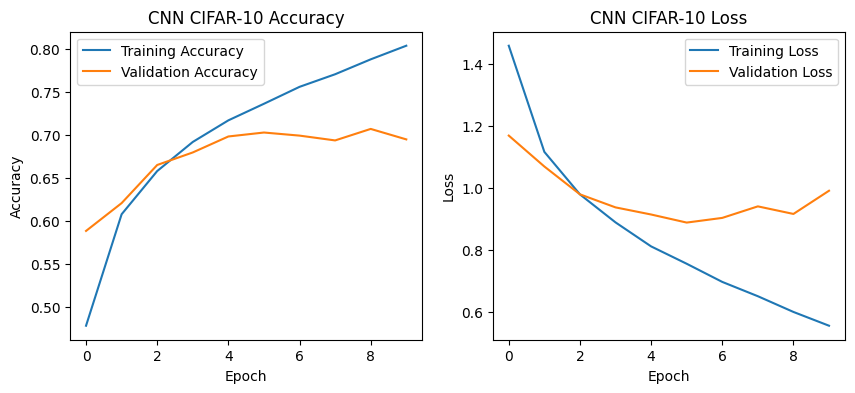

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), layers.MaxPooling2D((2,2)), # 32 filter atau fitur ukuran 3x3 (bobot) , input shape gambar ukuran 32 x 32, warna 3 chanel
    layers.Conv2D(64, (3,3), activation='relu'), # 62 filter atau fitur ukuran 3 x 3
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #10 kelas cifar
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas Kecil Praktikum D4

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2754 - loss: 1.9384 - val_accuracy: 0.5034 - val_loss: 1.4288
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4653 - loss: 1.4763 - val_accuracy: 0.5558 - val_loss: 1.2540
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5190 - loss: 1.3427 - val_accuracy: 0.6030 - val_loss: 1.1118
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5480 - loss: 1.2485 - val_accuracy: 0.6214 - val_loss: 1.0831
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5750 - loss: 1.1838 - val_accuracy: 0.6424 - val_loss: 1.0385
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5931 - loss: 1.1350 - val_accuracy: 0.6588 - val_loss: 0.9809
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6099 - loss: 1.0965 - val_accuracy: 0.6756 - val_loss: 0.9295
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6254 - loss: 1.0461 

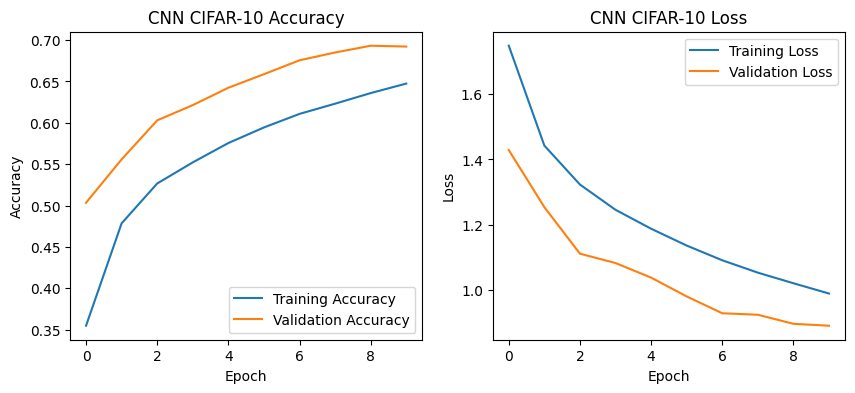

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), # dicari dulu polanya baru di flatten
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') #cifar10 punya 10 kelas
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D5-Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4598 - loss: 1.5536 - val_accuracy: 0.5738 - val_loss: 1.2132
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5778 - loss: 1.2081 - val_accuracy: 0.5902 - val_loss: 1.1590
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6017 - loss: 1.1469 - val_accuracy: 0.5860 - val_loss: 1.1786
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6156 - loss: 1.1044 - val_accuracy: 0.6090 - val_loss: 1.1243
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6260 - loss: 1.0714 - val_accuracy: 0.6092 - val_loss: 1.1286


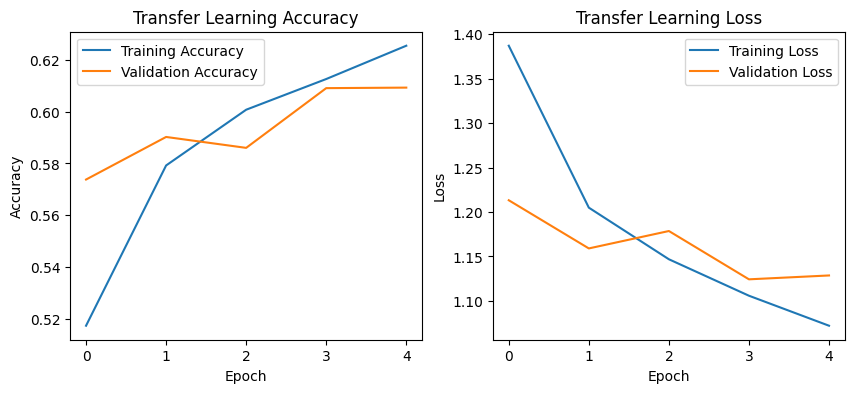

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([ base_model, layers.Flatten(), layers.Dense(128, activation='relu'), layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas Kecil Praktikum D5

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5044 - loss: 1.4133 - val_accuracy: 0.6268 - val_loss: 1.0728
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6348 - loss: 1.0494 - val_accuracy: 0.6290 - val_loss: 1.0734
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6594 - loss: 0.9729 - val_accuracy: 0.6566 - val_loss: 0.9813
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6729 - loss: 0.9244 - val_accuracy: 0.6532 - val_loss: 0.9794
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6945 - loss: 0.8707 - val_accuracy: 0.6624 - val_loss: 0.9622


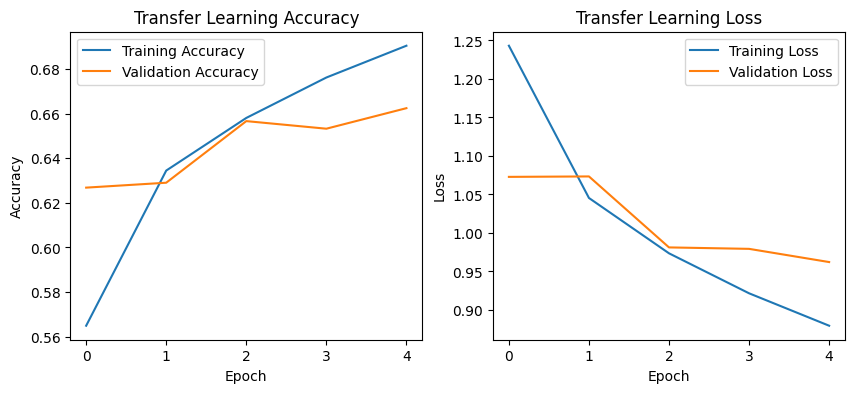

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# ===== Load data =====
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# ===== Base model VGG16 =====
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Bekukan semua layer, lalu buka 2 lapisan terakhir
base_model.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False

# ===== Bangun model =====
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ===== Compile & Train =====
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6-Evaluasi dengan Confusion Matrix dan Metrik lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.79      0.73      0.76      1000
           2       0.56      0.65      0.61      1000
           3       0.51      0.47      0.49      1000
           4       0.56      0.63      0.59      1000
           5       0.73      0.40      0.52      1000
           6       0.71      0.68      0.70      1000
           7       0.69      0.74      0.72      1000
           8       0.77      0.78      0.77      1000
           9       0.68      0.77      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



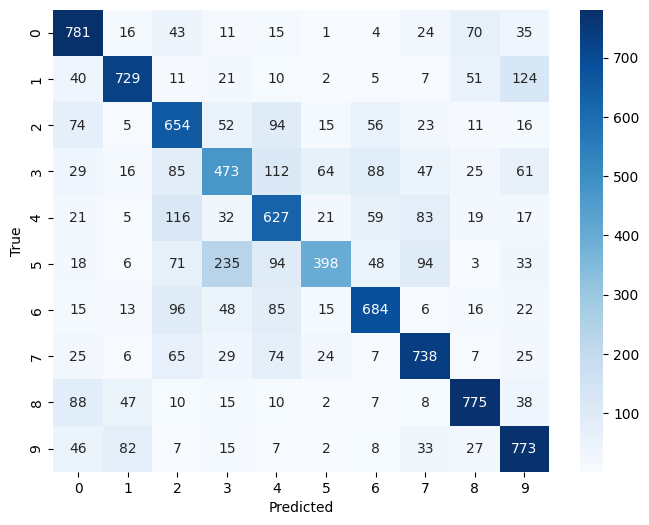

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Penugasan

### Pre Processing

In [5]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png) ini berupa dictionary

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas- hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
  """
  img = img_pil.convert('L') # jadi grayscale
  img = ImageOps.autocontrast(img) # auto kontras antar objek dan background
  arr = np.array(img).astype(np.uint8) #ini bisa karena menggunakan Image.open
  # 0 : hitam, 255 : putih, background (mean) berwarna putih (pixel > 127)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 sambil pertahanin aspect ratio
  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size
  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28, 28), color=0) # membuat sebuah kanvas dengan background hitam (0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2)) # menempel gambar di kanvas
  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0 # Tambah channel dim (28,28,1)
  # Tambah channel dim (28,28,1)
  arr = arr[..., None]

  return canvas, arr

Saving WIN_20250922_15_55_24_Pro.jpg to WIN_20250922_15_55_24_Pro.jpg


### Prediksi

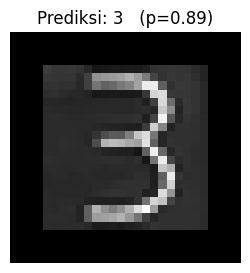

Rekap Prediksi (CNN):
- WIN_20250922_15_55_24_Pro.jpg -> 3 (p=0.892)


In [6]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname) #membuat objek yang punya properti width, height, dll dan bisa dibuat menjadi array menggunakan np.array
    disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)         # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0] # 10 kelas 0 - 9
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

# Tampilkan hasil
plt.figure(figsize=(3,3))
plt.imshow(disp, cmap='gray')
plt.title(f"Prediksi: {pred}   (p={conf:.2f})")
plt.axis('off')
plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")